In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as pls
import seaborn as sns

In [5]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')

In [7]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [8]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [15]:
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')

In [16]:
events_data.head(2)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48


In [19]:
events_data['day'] = events_data.date.dt.date
events_data.head(2)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15


In [27]:
# посмотрим количество уникальных пользователей за каждый день
nunique_users = events_data.groupby('day')['user_id'].nunique()
nunique_users.head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

In [30]:
sns.set(rc={'figure.figsize':(9,6)})

<AxesSubplot:xlabel='day'>

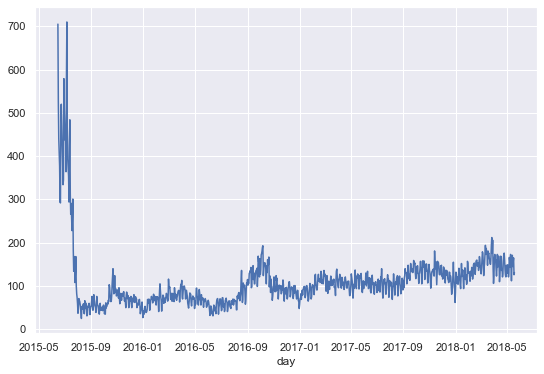

In [31]:
nunique_users.plot()

In [32]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [45]:
passed_steps = events_data\
    .loc[events_data['action']=='passed',:]\
    .groupby('user_id',as_index=False)\
    .agg({'step_id':'count'})\
    .rename(columns={'step_id':'passed_steps'})
passed_steps.head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


<AxesSubplot:>

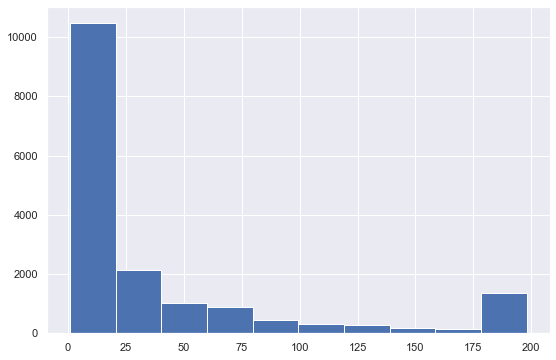

In [46]:
passed_steps['passed_steps'].hist()

In [52]:
df = events_data.pivot_table(index='user_id', #в результате каждая строчка будет информацией о каждом уникальном index

               columns='action', #колонки - все уникальные значения action

               values='step_id', #в ячейках будет находиться значение aggfunc(step_id)

               aggfunc='count', #функция применяемая к values

               fill_value=0).reset_index()
df.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<AxesSubplot:>

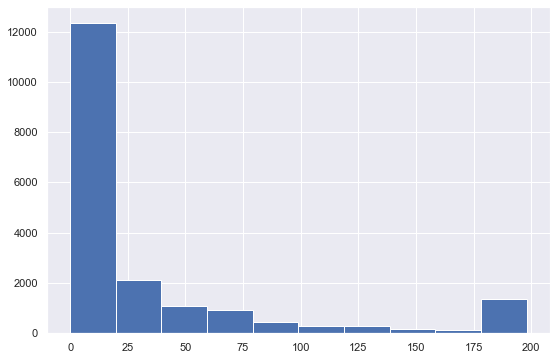

In [53]:
df['passed'].hist()

In [54]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')

In [55]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [56]:
submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit='s')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [69]:
submissions_data.pivot_table(
    index = 'user_id',
    columns = 'submission_status',
    values='step_id',
    aggfunc='count',
    fill_value=0
).reset_index()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [73]:
events_data[['step_id','timestamp']].head()

,step_id,timestamp
0,32815,1434340848
1,32815,1434340848
2,32815,1434340848
3,32811,1434340895
4,32811,1434340895


In [75]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [111]:
gap_data = events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values #посчитать разницу между каждыми соседними двумя заходами [1,2,5,10]->[1,3,5]
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int32)], dtype=object)

In [112]:
gap_data = pd.Series(np.concatenate(gap_data,axis=0))

In [115]:
gap_data = gap_data / (24 * 60 * 60) #разница в днях

<AxesSubplot:>

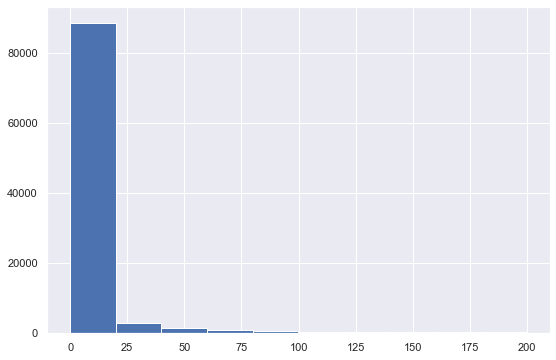

In [121]:
gap_data[gap_data < 200].hist()

In [172]:
gap_data.quantile(0.9)

18.325995370370403

In [166]:
df = events_data[['user_id','timestamp']].copy()
df
df=  df.drop_duplicates()\
    .groupby('user_id').agg({'timestamp':'count'})
df['max_diff'] = events_data.groupby('user_id').agg({'timestamp':'max'})-events_data.groupby('user_id').agg({'timestamp':'min'})
df.sort_values(by=['timestamp','max_diff'],ascending=False)


,timestamp,max_diff
user_id,,
20907,32764,19134194
10794,16089,31037341
25279,9777,6426734
1046,8834,90809338
3572,7245,26795106
...,...,...
26752,1,0
26767,1,0
26773,1,0


In [171]:
submissions_data[submissions_data['submission_status']=='correct'].groupby('user_id').agg({'submission_status':'count'}).sort_values(by='submission_status',ascending=ending=False)

,submission_status
user_id,
1046,421
5552,186
17135,168
6183,142
8461,135
...,...
6191,1
6184,1
6166,1


In [191]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [195]:
max_timestamp = events_data['timestamp'].max()

users_data = events_data.groupby('user_id',as_index=False).agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})
users_data.head()

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [198]:
users_data['is_gone_user'] = max_timestamp -  users_data['last_timestamp']
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,53945347
1,2,1519226966,7545845
2,3,1444581588,82191223
3,5,1499859939,26912872
4,7,1521634660,5138151


In [213]:
users_data['count_passed']=events_data.pivot_table(
    index = 'user_id',
    columns = 'action',
    values=  'step_id',
    aggfunc = 'count',
    fill_value=0
).reset_index()[['user_id','passed']]['passed']
users_data.head()

,user_id,last_timestamp,is_gone_user,count_passed
0,1,1472827464,53945347,0
1,2,1519226966,7545845,9
2,3,1444581588,82191223,87
3,5,1499859939,26912872,11
4,7,1521634660,5138151,1


<AxesSubplot:>

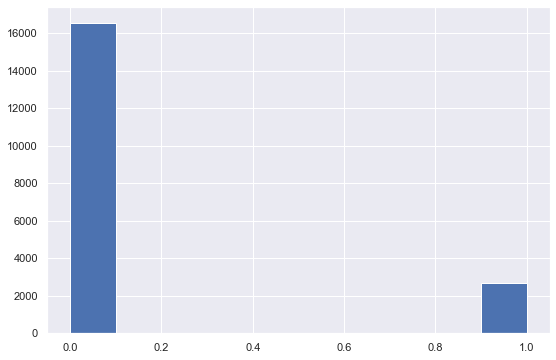

In [232]:
users_data['пройдет'] = (max_timestamp-users_data['last_timestamp'] > 30*24*60*60) & (users_data['count_passed']<170)
users_data['пройдет'] = 1 - users_data['пройдет'].astype(int)
users_data['пройдет'].hist()

In [235]:
len(users_data[users_data['пройдет']==1])/len(users_data)

0.13938858271810337